In [30]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [31]:
#Set Psudeorandom Seed
seed = 42

In [32]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/con_3.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [33]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:45]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [34]:
recall = []
f1 = []

In [35]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))


0.8890675241157556
[[930 108]
 [ 30 176]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1038
           1       0.62      0.85      0.72       206

    accuracy                           0.89      1244
   macro avg       0.79      0.88      0.82      1244
weighted avg       0.91      0.89      0.90      1244



In [37]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8987138263665595
[[958  80]
 [ 46 160]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1038
           1       0.67      0.78      0.72       206

    accuracy                           0.90      1244
   macro avg       0.81      0.85      0.83      1244
weighted avg       0.91      0.90      0.90      1244



In [38]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9115755627009646
[[994  44]
 [ 66 140]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1038
           1       0.76      0.68      0.72       206

    accuracy                           0.91      1244
   macro avg       0.85      0.82      0.83      1244
weighted avg       0.91      0.91      0.91      1244



In [39]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8938906752411575
[[969  69]
 [ 63 143]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1038
           1       0.67      0.69      0.68       206

    accuracy                           0.89      1244
   macro avg       0.81      0.81      0.81      1244
weighted avg       0.90      0.89      0.89      1244



In [40]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9043408360128617
[[1016   22]
 [  97  109]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1038
           1       0.83      0.53      0.65       206

    accuracy                           0.90      1244
   macro avg       0.87      0.75      0.80      1244
weighted avg       0.90      0.90      0.90      1244



In [41]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9236334405144695
[[1000   38]
 [  57  149]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1038
           1       0.80      0.72      0.76       206

    accuracy                           0.92      1244
   macro avg       0.87      0.84      0.86      1244
weighted avg       0.92      0.92      0.92      1244



In [42]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8705787781350482
[[944  94]
 [ 67 139]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1038
           1       0.60      0.67      0.63       206

    accuracy                           0.87      1244
   macro avg       0.77      0.79      0.78      1244
weighted avg       0.88      0.87      0.87      1244



In [43]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9260450160771704
[[998  40]
 [ 52 154]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1038
           1       0.79      0.75      0.77       206

    accuracy                           0.93      1244
   macro avg       0.87      0.85      0.86      1244
weighted avg       0.92      0.93      0.93      1244



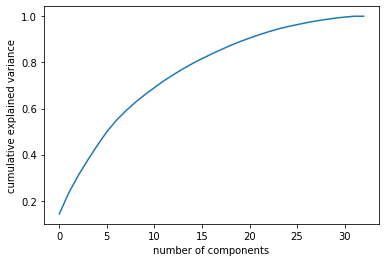

In [44]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [46]:
pca.n_components_

16

In [47]:
pca.explained_variance_ratio_

array([0.14299268, 0.09139424, 0.07574206, 0.06680004, 0.06308334,
       0.05943323, 0.04911513, 0.04135786, 0.03699801, 0.03295333,
       0.03056098, 0.03003317, 0.02623814, 0.02500955, 0.02327153,
       0.0210531 ])

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14299268, 0.23438692, 0.31012898, 0.37692902, 0.44001236,
       0.4994456 , 0.54856073, 0.58991859, 0.6269166 , 0.65986994,
       0.69043092, 0.72046409, 0.74670223, 0.77171178, 0.79498331,
       0.81603641])

In [49]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [50]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8786173633440515
[[921 117]
 [ 34 172]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1038
           1       0.60      0.83      0.69       206

    accuracy                           0.88      1244
   macro avg       0.78      0.86      0.81      1244
weighted avg       0.90      0.88      0.89      1244



In [51]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8593247588424437
[[896 142]
 [ 33 173]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1038
           1       0.55      0.84      0.66       206

    accuracy                           0.86      1244
   macro avg       0.76      0.85      0.79      1244
weighted avg       0.90      0.86      0.87      1244



In [52]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8818327974276527
[[925 113]
 [ 34 172]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1038
           1       0.60      0.83      0.70       206

    accuracy                           0.88      1244
   macro avg       0.78      0.86      0.81      1244
weighted avg       0.90      0.88      0.89      1244



In [53]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8729903536977492
[[931 107]
 [ 51 155]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1038
           1       0.59      0.75      0.66       206

    accuracy                           0.87      1244
   macro avg       0.77      0.82      0.79      1244
weighted avg       0.89      0.87      0.88      1244



In [54]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.75
[[744 294]
 [ 17 189]]
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1038
           1       0.39      0.92      0.55       206

    accuracy                           0.75      1244
   macro avg       0.68      0.82      0.69      1244
weighted avg       0.88      0.75      0.78      1244



In [55]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.7628617363344051
[[762 276]
 [ 19 187]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1038
           1       0.40      0.91      0.56       206

    accuracy                           0.76      1244
   macro avg       0.69      0.82      0.70      1244
weighted avg       0.88      0.76      0.79      1244



In [56]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8207395498392283
[[899 139]
 [ 84 122]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1038
           1       0.47      0.59      0.52       206

    accuracy                           0.82      1244
   macro avg       0.69      0.73      0.71      1244
weighted avg       0.84      0.82      0.83      1244



In [57]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9011254019292605
[[941  97]
 [ 26 180]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1038
           1       0.65      0.87      0.75       206

    accuracy                           0.90      1244
   macro avg       0.81      0.89      0.84      1244
weighted avg       0.92      0.90      0.91      1244



In [58]:
print(recall)
print(f1)

[0.8543689320388349, 0.7766990291262136, 0.6796116504854369, 0.6941747572815534, 0.529126213592233, 0.7233009708737864, 0.6747572815533981, 0.7475728155339806, 0.8349514563106796, 0.8398058252427184, 0.8349514563106796, 0.7524271844660194, 0.9174757281553398, 0.9077669902912622, 0.5922330097087378, 0.8737864077669902]
[0.7183673469387755, 0.7174887892376681, 0.7179487179487181, 0.6842105263157896, 0.6468842729970327, 0.7582697201017812, 0.6332574031890661, 0.77, 0.694949494949495, 0.6641074856046064, 0.7006109979633401, 0.6623931623931624, 0.5486211901306242, 0.5590433482810164, 0.5224839400428265, 0.7453416149068323]
